In [24]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import shapefile as shp
import numpy     as np
import pyfesom2  as pf
import xarray    as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Parameters
# mesh_path = '/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
mesh_path = '/work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/'
save_path = None #'~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= 2
which_mode= 'transect_tseries'

#_____________________________________________________________________________________
input_paths= list()
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.3/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/')

input_names= list()
input_names.append('TKE+idemix,ck0.1,jayne')
input_names.append('TKE+idemix,ck0.1,nycand')
input_names.append('TKE+idemix,ck0.1,stormt')
input_names.append('TKE+idemix,ck0.3,jayne')
input_names.append('TKE+idemix,ck0.3,nycand')
input_names.append('TKE+idemix,ck0.3,stormt')
input_names.append('TKE ck0.1')
input_names.append('TKE ck0.3')

vname     = 'vflx'
year      = [1958,2019]
mon, day, record, box, depth = None, None, None, None, None

input_transect = list()
input_transect.append([[-66, -66,  -67, -55], 'Drake Passage @ 66°W, 67°S-55°S'])

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None # 'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
cstr      = 'blue2red'
cnum      = 20
cref      = 0
crange, cmin, cmax, cfac = None, None, None, None

#_____________________________________________________________________________________
which_dpi = 300
do_allcycl= False
do_concat = False

In [3]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
# mymesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True,
#                       do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

#______________________________________________________________________________________________________
if which_cycl is not None: 
    #__________________________________________________________________________________________________
    if do_allcycl: cycl_s=1
    else         : cycl_s=which_cycl    
    
    #__________________________________________________________________________________________________
    aux_path, aux_name = list(), list()
    input_paths_old, input_names_old = input_paths, input_names
    for ii, (ipath,iname) in enumerate(zip(input_paths,input_names)):
        for ii_cycl in range(cycl_s, which_cycl+1):
            # input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
            aux_path.append(os.path.join(ipath,'{:d}/'.format(ii_cycl)))
            if not do_allcycl: aux_name.append('{}'.format(iname))
            else             : aux_name.append('{:d}) {}'.format(ii_cycl, iname))
            print(ii, aux_path[-1],aux_name[-1])
    input_paths, input_names = aux_path, aux_name
    
    #__________________________________________________________________________________________________
    if ref_path is not None:
        aux_path, aux_name = list(), list()
        ref_path_old, ref_name_old = ref_path, ref_name
        for ii_cycl in range(cycl_s, which_cycl+1):
            #ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
            aux_path.append(os.path.join(ref_path,'{:d}/'.format(ii_cycl)))
            if not do_allcycl: aux_name.append('{}'.format(ref_name))
            else             : aux_name.append('{:d}) {}'.format(ii_cycl, ref_name))
            print('R', ref_path[-1])        
        ref_path, ref_name = aux_path, aux_name
    del(aux_path, aux_name)    
    
#______________________________________________________________________________________________________        
cinfo=dict({'cstr':cstr, 'cnum':cnum}) 
if crange   is not None: cinfo['crange']=crange
if cmin     is not None: cinfo['cmin'  ]=cmin
if cmax     is not None: cinfo['cmax'  ]=cmax
if cref     is not None: cinfo['cref'  ]=cref
if cfac     is not None: cinfo['cfac'  ]=cfac   
if ref_path is not None: cinfo['cref'  ]=0.0    
    
#______________________________________________________________________________________________________
# in case of diff plots
if ref_path is not None:
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record  

0 /home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/2/ TKE+idemix,ck0.1,jayne,scycl:2
1 /home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.1/2/ TKE+idemix,ck0.1,nycand,scycl:2
2 /home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.1/2/ TKE+idemix,ck0.1,stormt,scycl:2
3 /home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/2/ TKE+idemix,ck0.3,jayne,scycl:2
4 /home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.3/2/ TKE+idemix,ck0.3,nycand,scycl:2
5 /home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.3/2/ TKE+idemix,ck0.3,stormt,scycl:2
6 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/2/ TKE ck0.1,scycl:2
7 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.3/2/ TKE ck0.3,scycl:2


In [4]:
# load mesh with pyfesom2
mesh = pf.load_mesh(mesh_path)

# load mesh diagnostic with pyfesom2
fname = 'fesom.mesh.diag.nc'
if   os.path.isfile( os.path.join(input_paths[0], fname) ): 
    dname = input_paths[0]
elif os.path.isfile( os.path.join( os.path.join(os.path.dirname(os.path.normpath(input_paths[0])),'1/'), fname) ): 
    dname = os.path.join(os.path.dirname(os.path.normpath(input_paths[0])),'1/')
elif os.path.isfile( os.path.join(mesh_path,fname) ): 
    dname = mesh.path
else:
    raise ValueError('could not find directory with...mesh.diag.nc file')
diagpath = os.path.join(dname,fname)
mesh_diag = xr.open_dataset(diagpath)

/work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/pscholz/mesh_fesom2.0/core2_srt_dep@node/pickle_mesh_py3_fesom2


In [22]:
#_______________________________________________________________________________________________
# concatenate list = list1+list2
if ref_path is not None: 
    if isinstance(ref_path, list): 
        input_paths, input_names = ref_path + input_paths, ref_name + input_names
    else:    
        input_paths, input_names = list([ref_path]) + input_paths, list([ref_name]) + input_names

#_______________________________________________________________________________________________
# compute volume transport through section 
vflxtseries_list = list()
for datapath, descript in zip(input_paths, input_names): 
    print(datapath, descript)
    
    transport, section = pf.cross_section_transport(
        input_transect[0][0],              # select a section from the presets or [lon1, lon2, lat1, lat2]
        mesh=mesh,                         # mesh
        data_path=datapath,                # directory of the u, v, (T, S, uice, vice, m_ice, a_ice) files
        mesh_diag=mesh_diag,               # mesh_diag
        years=np.arange(year[0],year[1]+1),  # years to compute
        use_great_circle=False,            # compute the section as a great circle
        how='ori',                         # 'ori' do not apply mean, 'mean' apply time mean
        add_TS=False,                      # add temperature and salinity to the section
        add_extent=10,                      # the extent to look for gridcells nerby the section, choose large for low resolutions
        n_points=1000                      # number of waypoints between the start and end of the section
        )

    #____________________________________________________________________________________________
    # comppute net-transpoort through section
    vflx = transport.transport_across.sum(dim=('elem','nz1')) * 1e-6
    vflxtseries_list.append(vflx)

time = transport['time.year'].data + (transport['time.month'].data-12)/12 

/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.1/2/ TKE+idemix,ck0.1,jayne,scycl:2
Starting computation...

Your section:  not specified : Start:  -66 °E  -67 °N  End:  -66 °E  -55 °N

Converting grid cells to Polygons... (If this takes very long try to reduce the add_extent parameter)


  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  5.6s
[########################################] | 100% Completed |  5.7s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  6.0s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.1s
[########################################] | 100% Completed |  6.1s

 Done!
/home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.1/2/ TKE+idemix,ck0.1,nycand,scycl:2
Starting computation...

Your section:  not specified : Start:  -66 °E  -67 °N  End:  -66 °E  -55 °N

Converting grid cells to Polygons... (If this takes very long try to reduce the add_extent parameter)


  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  9.7s
[########################################] | 100% Completed |  9.7s
[########################################] | 100% Completed |  9.8s
[########################################] | 100% Completed |  9.8s
[########################################] | 100% Completed |  9.9s
[########################################] | 100% Completed |  9.9s
[########################################] | 100% Completed | 10.0s
[########################################] | 100% Completed | 10.1s
[########################################] | 100% Completed | 10.2s
[########################################] | 100% Completed | 10.3s

 Done!
/home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.1/2/ TKE+idemix,ck0.1,stormt,scycl:2
Starting computation...

Your section:  not specified : Start:  -66 °E  -67 °N  End:  -66 °E  -55 °N

Converting grid cells to Polygons... (If this takes very long try to reduce the 

  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  7.4s
[########################################] | 100% Completed |  7.5s
[########################################] | 100% Completed |  7.6s
[########################################] | 100% Completed |  7.7s
[########################################] | 100% Completed |  7.8s
[########################################] | 100% Completed |  7.8s
[########################################] | 100% Completed |  7.9s
[########################################] | 100% Completed |  7.9s
[########################################] | 100% Completed |  7.9s
[########################################] | 100% Completed |  8.0s
[########################################] | 100% Completed |  8.0s

 Done!
/home/ollie/pscholz/results/trr181_tke+idemix_jayne09_ck0.3/2/ TKE+idemix,ck0.3,jayne,scycl:2
Starting computation...

Your section:  not specified : Start:  -66 °E  -67 °N  End:  -66 °E  -55 °N

Converting grid 

  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  5.4s

 Done!
/home/ollie/pscholz/results/trr181_tke+idemix_nycander05_ck0.3/2/ TKE+idemix,ck0.3,nycand,scycl:2
Starting computation...

Your section:  not sp

  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  5.3s
[########################################] | 100% Completed |  5.3s

 Done!
/home/ollie/pscholz/results/trr181_tke+idemix_stormtide2_ck0.3/2/ TKE+idemix

  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  3.3s
[########################################] | 100% Completed |  3.4s
[########################################] | 100% Completed |  3.4s
[########################################] | 100% Completed |  3.5s
[########################################] | 100% Completed |  3.6s
[########################################] | 100% Completed |  3.7s
[########################################] | 100% Completed |  3.8s
[########################################] | 100% Completed |  3.9s
[########################################] | 100% Completed |  3.9s
[########################################] | 100% Completed |  3.9s
[########################################] | 100% Completed |  4.0s
[########################################] | 100% Completed |  4.0s
[########################################] | 100% Completed |  4.1s
[########################################] | 100% Completed |  4.0s

 Done!
/home/ol

  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  3.9s
[########################################] | 100% Completed |  4.0s
[########################################] | 100% Completed |  4.1s
[########################################] | 100% Completed |  4.1s
[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed |  4.2s
[########################################] | 100% Completed |  4.3s
[########################################] | 100% Completed |  4.4s
[########################################] | 100% Completed |  4.5s
[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.8s
[###############

  0%|          | 0/2967 [00:00<?, ?it/s]

Looking for intersected grid cells...


  0%|          | 0/2967 [00:00<?, ?it/s]

Loading the data into memory...
[########################################] | 100% Completed |  4.5s
[########################################] | 100% Completed |  4.6s
[########################################] | 100% Completed |  4.7s
[########################################] | 100% Completed |  4.8s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  4.9s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.0s
[########################################] | 100% Completed |  5.1s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.2s
[########################################] | 100% Completed |  5.3s
[###############

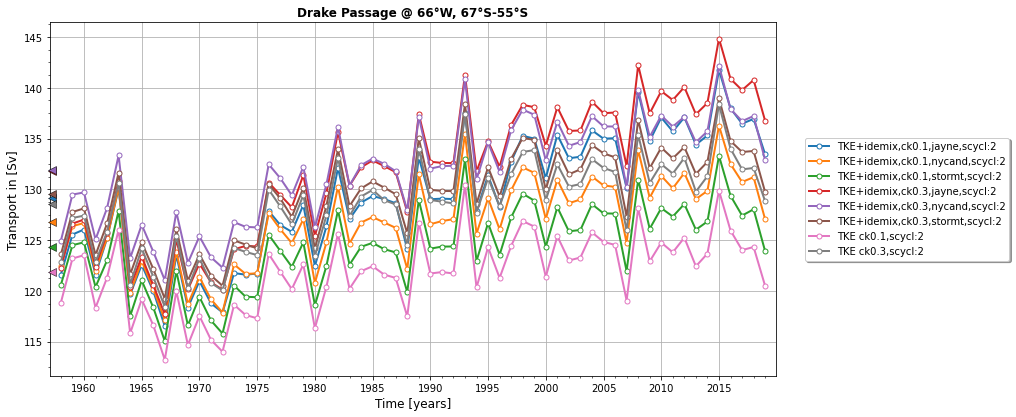

In [27]:
#___PLOT FESOM2 DATA___________________________________________________________________________________
spath  = save_path
sname  = vname
slabel = input_transect[0][1].replace(' ','_')
if spath is not None: spath  = os.path.join(spath,'{}_{}_{}.png'.format(which_mode, sname, slabel)) 
if save_fname is not None: spath = save_fname
    
fig,ax=tpv.plot_vflx_tseries(time, vflxtseries_list, input_names, input_transect[0][1],  
                              which_cycl=which_cycl, do_allcycl=do_allcycl, do_concat=do_concat, 
                              do_save=spath, save_dpi=which_dpi, )  